In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv', parse_dates=['DATE'], index_col=['DATE'])
df.columns = ["KOUS"]
df['KOUS'].replace('.', '', inplace=True)
df['KOUS'] = pd.to_numeric(df['KOUS'])
df.fillna(method='ffill', inplace=True)

<AxesSubplot:xlabel='DATE'>

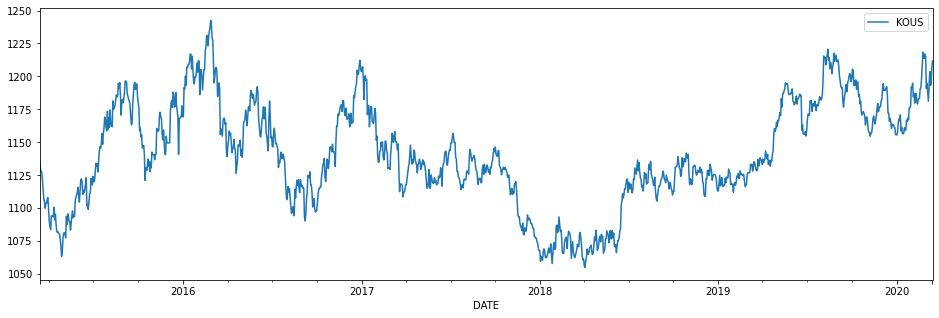

In [9]:
df.plot(figsize=(16, 5))

In [10]:
df_w = df.resample('W-Fri').last()

In [11]:
df_2017 = df_w[df_w.index.year==2017]
df_2019 = df_w[df_w.index.year==2019]

In [12]:
df_2019.tail()

,KOUS
DATE,
2019-11-29,1181.33
2019-12-06,1189.86
2019-12-13,1171.97
2019-12-20,1160.30
2019-12-27,1160.87


<AxesSubplot:xlabel='DATE'>

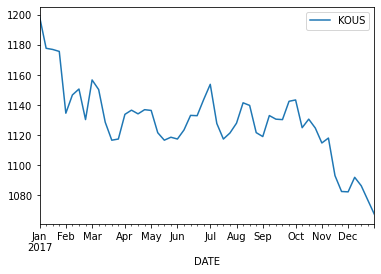

In [13]:
df_2017.plot()

<AxesSubplot:xlabel='DATE'>

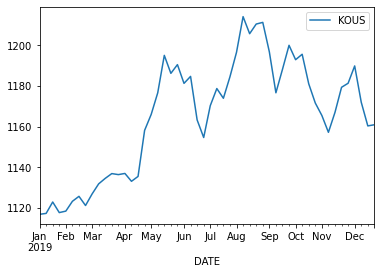

In [14]:
df_2019.plot()

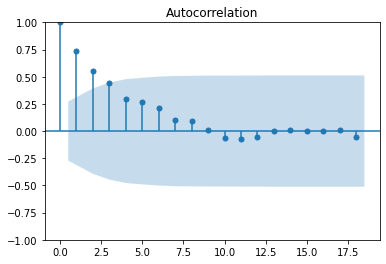

In [16]:
plot_acf(df_2017)
plt.show()

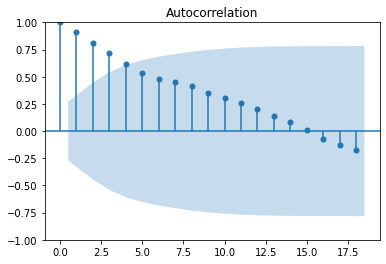

In [17]:
plot_acf(df_2019)
plt.show()

C:\ProgramData\Anaconda3\envs\new-env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\new-env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


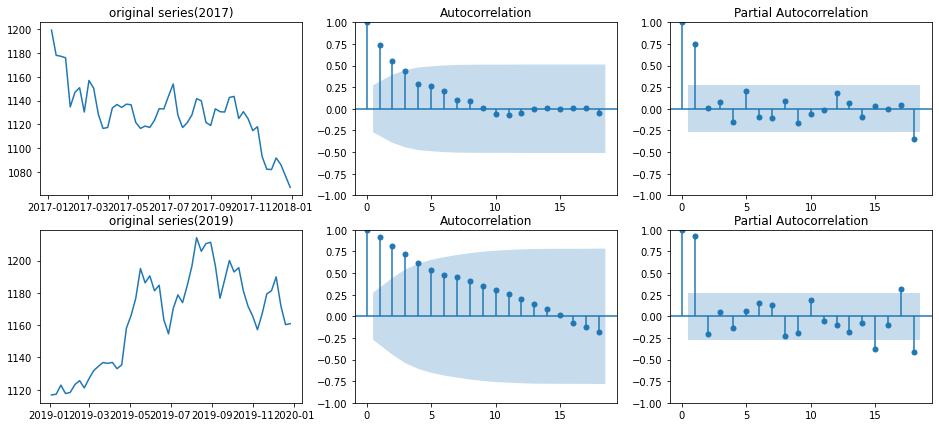

In [19]:
# 첫번째 행 : 2017년 데이터의 원계열. ACF, PACF
# 두번째 행 : 2019년 데이터의 원계열. ACF, PACF
figure, axes = plt.subplots(2, 3, figsize=(16, 7))
axes[0,0].plot(df_2017)
axes[0,0].set_title('original series(2017)')
axes[1,0].plot(df_2019)
axes[1,0].set_title('original series(2019)')
plot_acf(df_2017, ax=axes[0,1])
plot_acf(df_2019, ax=axes[1,1])
plot_pacf(df_2017, ax=axes[0,2])
plot_pacf(df_2019, ax=axes[1,2])
plt.show()

• 2017년에 비해 2019년은 외부 충격이 오래 지속되었다. 3주~4주
• 2017년에는 외부충격이 다음기에 0.75 남아있지만, 2019년에는 0.9 남아있다.(persistency가 증가하고 있다.) --> 가입자, 사용자 마케팅효과 분석 --> 주가지수, 환율 : 외부 충격이 얼마나 오래 지속되는가?